# Guided Project: Optimizing Model Prediction
## Table of Contents 
1. [Introduction](#introduction)
2. [Dataset Exploration](#data-explore)
3. [Dataset Cleaning (I)](#data-cleaning1)
4. [Dataset Cleaning (II)](#data-cleaning2)
5. [Feature Selection](#feat-select)
6. [Building the Decision Tree](#build-tree)
7. [Using Random Forest](#forest)
8. [Final Conclusions](#final)

## Introduction <a name="introduction"></a>

![?.jpg](img/optimmodelpred/?.jpg)

Image source: [Designed by Freepik](http://www.freepik.com/)

This is a project I completed based on a guide called "Optimizing Model Prediction" on the Dataquest learning platform. It starts with a reference machine learning model and then iterates on it using various techniques learnt on the platform.

In this project I have learned new skills related to Machine Learning in Python. 

The implementation is written in Python and is shown in Jupyter Notebooks.

### Goal of this project
The dataset is *Forest Fires*, of which the source is the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires)

Below is a description of the data, according to the source:

> This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and
> other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires)
>

## Dataset Exploration <a name="data-explore"></a>

This dataset was mined by a group of researchers (Cortez and Morais, 2007). 

#### Data dictionary
We are tasked with predicting the extent of fire damage to a forest.

Here is the documentation of the dataset:

1. 'X' - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. 'Y' - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. 'month' - month of the year: 'jan' to 'dec' 
4. 'day' - day of the week: 'mon' to 'sun'
5. 'FFMC' - FFMC index from the FWI system: 18.7 to 96.20
6. 'DMC' - DMC index from the FWI system: 1.1 to 291.3 
7. 'DC' - DC index from the FWI system: 7.9 to 860.6 
8. 'ISI' - ISI index from the FWI system: 0.0 to 56.10
9. 'temp' - temperature in Celsius degrees: 2.2 to 33.30
10. 'RH' - relative humidity in %: 15.0 to 100
11. 'wind' - wind speed in km/h: 0.40 to 9.40 
12. 'rain' - outside rain in mm/m2 : 0.0 to 6.4 
13. 'area' - the burned area of the forest (in ha): 0.00 to 1090.84 



### Import the dependencies
First we need to import the libraries we think will at minimum be required for this project: pandas, numpy and matplotlib.pyplot.


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load and explore the data
The garments worker productivity observations are stored in 1 file. **Note:** we took the file from the Dataquest learning platform, not the original from the data source. The reason was to exercise the skills learned so far.
1. fires.csv

In [100]:
# load files into dataframes
fires_df = pd.read_csv("data/optimmodelpred/fires.csv", index_col=0)
# reset index to 0
fires_df = fires_df.reset_index(drop=True)

For a preview of the loaded data, display the first five rows of the dataset.

In [101]:
# explore the employee productivity data
fires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


For an idea of the size of the dataset, show the number of features and observations.

In [102]:
print(f"Number of features: {fires_df.shape[1]}")
print(f"Number of observations: {fires_df.shape[0]}")

Number of features: 13
Number of observations: 517


Let's start exploring the columns in more details.

In [103]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    469 non-null    float64
 5   DMC     496 non-null    float64
 6   DC      474 non-null    float64
 7   ISI     515 non-null    float64
 8   temp    496 non-null    float64
 9   RH      487 non-null    float64
 10  wind    482 non-null    float64
 11  rain    485 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [104]:
fires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,469.000000,496.000000,474.000000,515.000000,496.000000,487.000000,482.000000,485.000000,517.000000
mean,4.669246,4.299807,90.580384,111.195363,550.673418,9.018835,18.884677,44.381930,4.021784,0.023093,12.847292
std,2.313778,1.229900,5.698137,64.008450,246.061309,4.564890,5.748318,16.180372,1.794460,0.305532,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,70.800000,441.200000,6.450000,15.475000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.800000,141.575000,713.900000,10.750000,22.725000,53.500000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [105]:
fires_df.isnull().sum()

X         0
Y         0
month     0
day       0
FFMC     48
DMC      21
DC       43
ISI       2
temp     21
RH       30
wind     35
rain     32
area      0
dtype: int64

Observations:
* **there are several columns with empty values:** from 'FFMC' to 'rain'. There is a need for handling missing data
* the data types are a combination of integers, floating points and strings. 
* There are two columns which are strings namely 'month' and 'day'. The former could be useful as the magnitude of fires are usually determined by the season. Let's convert to a categorical value later.

#### Distribution of the data
Next we look at the distribution of the data for each column. A histogram is a good visual for this. 

First, look at the distribution of the 'area' (target variable).

<Axes: >

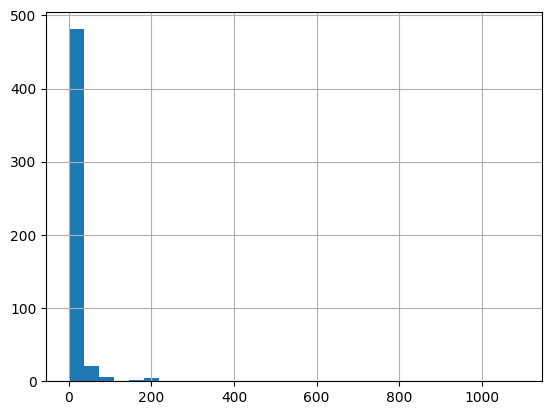

In [106]:
fires_df['area'].hist(bins=30)

From the above histogram, we can see that the distribution is extremely right-skewed. We need to transform our target variable 'area' as there are a lot of zero values. One way to reduce the skewness of the variable's distribution is to use log transformation.

We add a 1 to the 'area' as the zero values will result in log(0) which is not valid.

<Axes: >

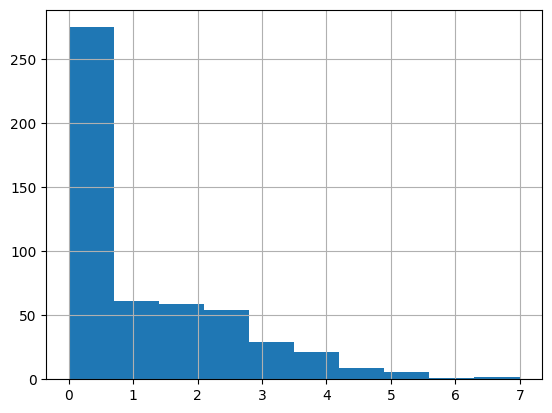

In [107]:
fires_df['area_log'] = np.log(fires_df['area'] + 1)
fires_df['area_log'].hist(bins=10)

This looks better, its still right skewed but probably its a better representation of the 'area' variable for our purposes. 

#### Data cleaning

In Portugal, summer is June, July and August. Let's drop 'day', and we use 'month' to create a new categorical value, namely 'is_summer'. First, we drop the 'day' column, then derive the 'is_summer' column and drop the 'month'column. 

In [108]:
fires_clean_df = fires_df.copy()

fires_clean_df = fires_clean_df.drop('day', axis=1)
fires_clean_df['is_summer'] = fires_clean_df['month'].apply(lambda x: 1 if x in ['jun', 'jul', 'aug'] else 0)
fires_clean_df = fires_clean_df.drop('month', axis=1)

print(fires_clean_df['is_summer'].value_counts(normalize=True))
print(fires_clean_df.info())

is_summer
0    0.549323
1    0.450677
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       469 non-null    float64
 3   DMC        496 non-null    float64
 4   DC         474 non-null    float64
 5   ISI        515 non-null    float64
 6   temp       496 non-null    float64
 7   RH         487 non-null    float64
 8   wind       482 non-null    float64
 9   rain       485 non-null    float64
 10  area       517 non-null    float64
 11  area_log   517 non-null    float64
 12  is_summer  517 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 52.6 KB
None


Next, we will handle the missing data by using a KNNImputer.

In [109]:
from sklearn.impute import KNNImputer

imp = KNNImputer(missing_values = np.nan,n_neighbors=3)
missing_cols = fires_clean_df.iloc[:, 2:10] # from FFMC to rain
column_names = missing_cols.columns
imputed_data = imp.fit_transform(missing_cols)
fires_imputed_df = pd.DataFrame(imputed_data, columns=column_names)
fires_imputed_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.200000,94.300000,5.1,16.6,51.0,6.700000,0.0
1,90.6,56.433333,669.100000,6.7,18.0,33.0,0.900000,0.0
2,90.6,43.700000,470.833333,6.7,14.6,33.0,1.300000,0.0
3,91.7,33.300000,77.500000,9.0,8.3,97.0,4.000000,0.2
4,89.3,51.300000,102.200000,9.6,11.4,99.0,4.333333,0.0


In [110]:
fires_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    517 non-null    float64
 1   DMC     517 non-null    float64
 2   DC      517 non-null    float64
 3   ISI     517 non-null    float64
 4   temp    517 non-null    float64
 5   RH      517 non-null    float64
 6   wind    517 non-null    float64
 7   rain    517 non-null    float64
dtypes: float64(8)
memory usage: 32.4 KB


In [111]:
fires_imputed_df.isna().sum()

FFMC    0
DMC     0
DC      0
ISI     0
temp    0
RH      0
wind    0
rain    0
dtype: int64

After imputation, there are no more missing values in the columns we identified earlier.

Next, we check the full dataset for outliers.

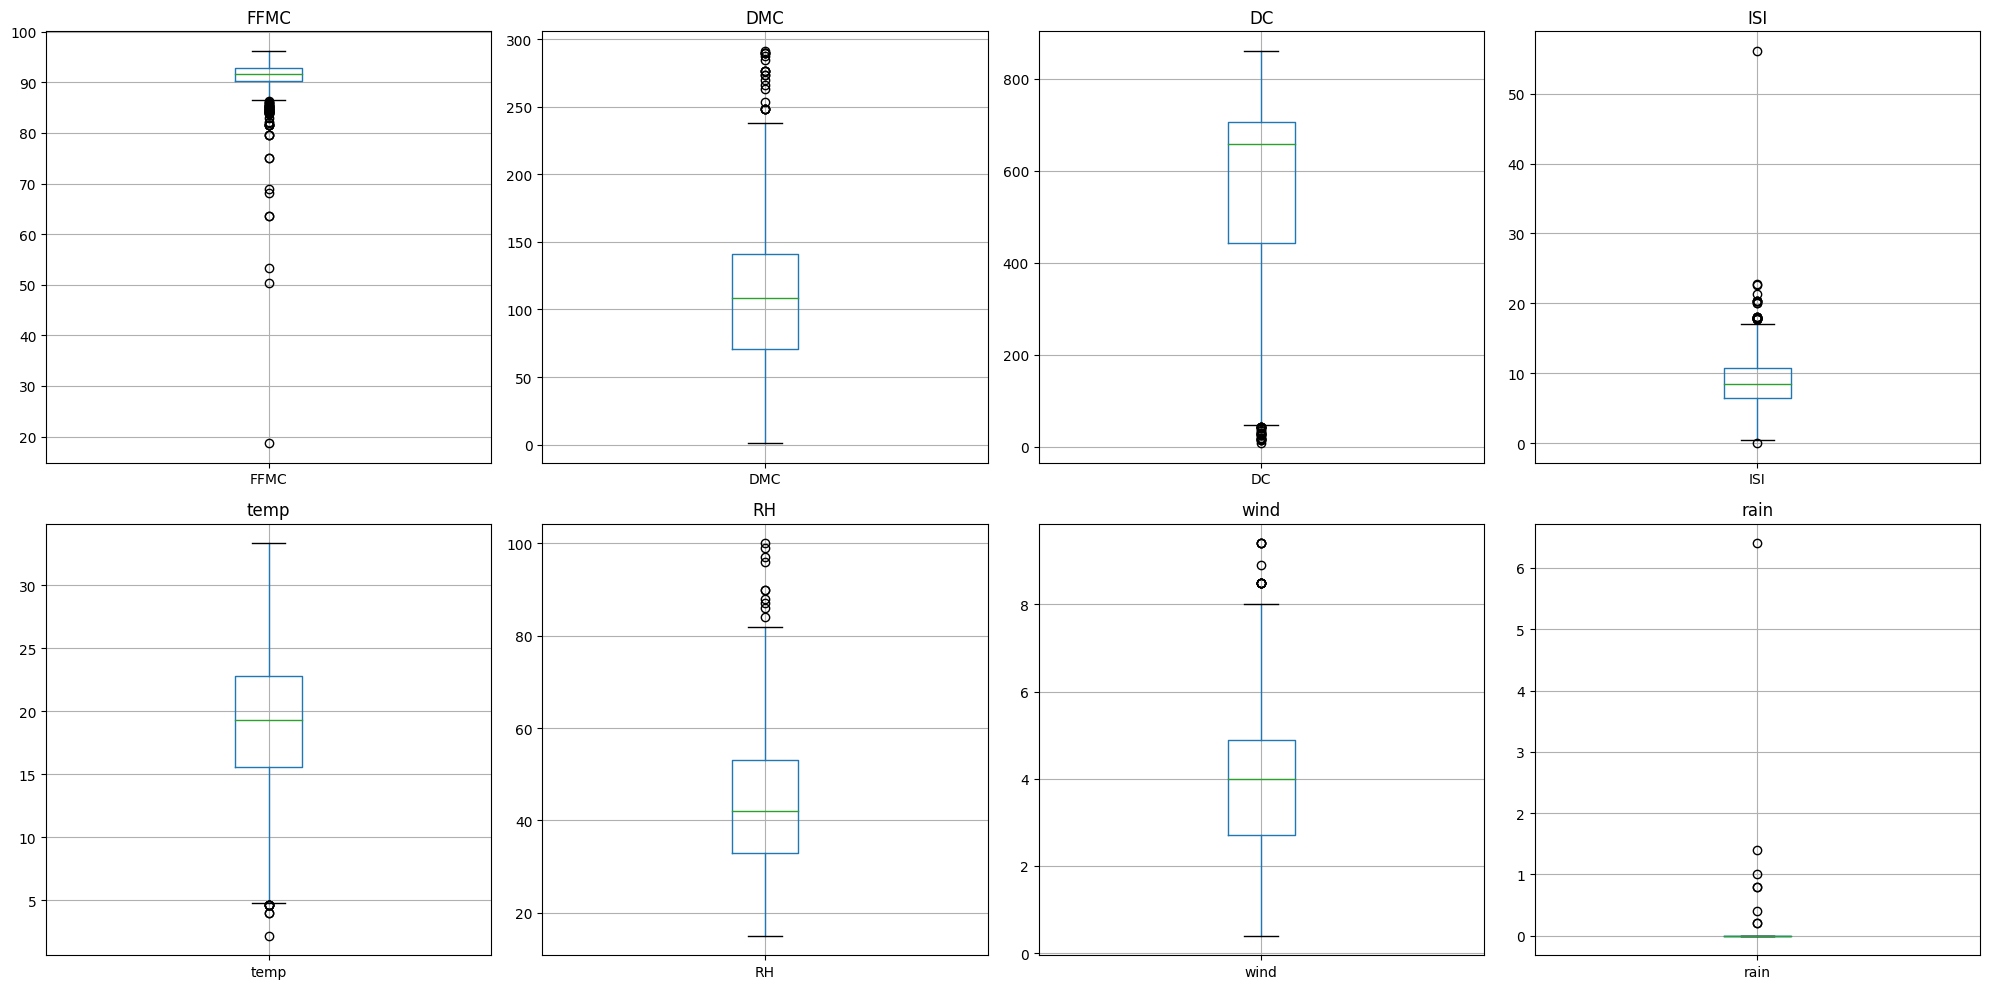

In [112]:
# Assuming fires_imputed_df is your DataFrame
plot_columns = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]

# Create a figure and axes for each column
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Create a boxplot for each column
for i, column in enumerate(plot_columns):
    fires_imputed_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

The small black circles represent the outliers. The most prominent cases are for 'FFMC', 'DMC' and 'DC'. To be sure though, let's examine the dataset more closely using the numerical definition of what an outlier is, using a helper function.

In [113]:
def count_outliers(df):
    outliers = {}
    for col in df:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers[col] = sum((df[col] < lower_bound) | (df[col] > upper_bound))
    print(outliers)

count_outliers(fires_imputed_df)

{'FFMC': 53, 'DMC': 22, 'DC': 25, 'ISI': 23, 'temp': 9, 'RH': 10, 'wind': 13, 'rain': 8}


Indeed, there are several outliers in each of the columns. However, they mostly seem to be quite close to the maximum values, so in this case, we will keep these observations.

#### Standardization
We standardize the imputed columns. This will help our model prediction later. 

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # defaults to with_mean=True, with_std=True
fires_scaled_df = scaler.fit_transform(fires_imputed_df)
fires_scaled_df = pd.DataFrame(fires_scaled_df, columns=column_names)
fires_scaled_df.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268
1,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268
2,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268
3,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155
4,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268


Finally we combine this with our our engineered 'is_summer' feature, and the target 'area_log'. 

In [115]:
fires_final_df = pd.concat([fires_clean_df[['is_summer', 'area_log']], fires_scaled_df], axis=1)
fires_final_df.head()

,is_summer,area_log,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0,0.0,-0.812283,-1.335942,-1.846711,-0.860187,-0.398187,0.418726,1.514159,-0.073268
1,0,0.0,-0.010735,-0.859009,0.509582,-0.508736,-0.155493,-0.715565,-1.761003,-0.073268
2,0,0.0,-0.010735,-1.059878,-0.303178,-0.508736,-0.744894,-0.715565,-1.535130,-0.073268
3,0,0.0,0.189652,-1.223939,-1.915580,-0.003526,-1.837021,3.317471,-0.010485,0.603155
4,0,0.0,-0.247556,-0.939988,-1.814327,0.128267,-1.299625,3.443503,0.177742,-0.073268


## Data Visualization <a name="data-vis"></a>

As we were tasked of building upon the linear regression model, maybe we should first check if this is the best model at all. We can do this by examining the univariate relationship of each feature with the terget variable, 'area_log', by using a scatter plot.

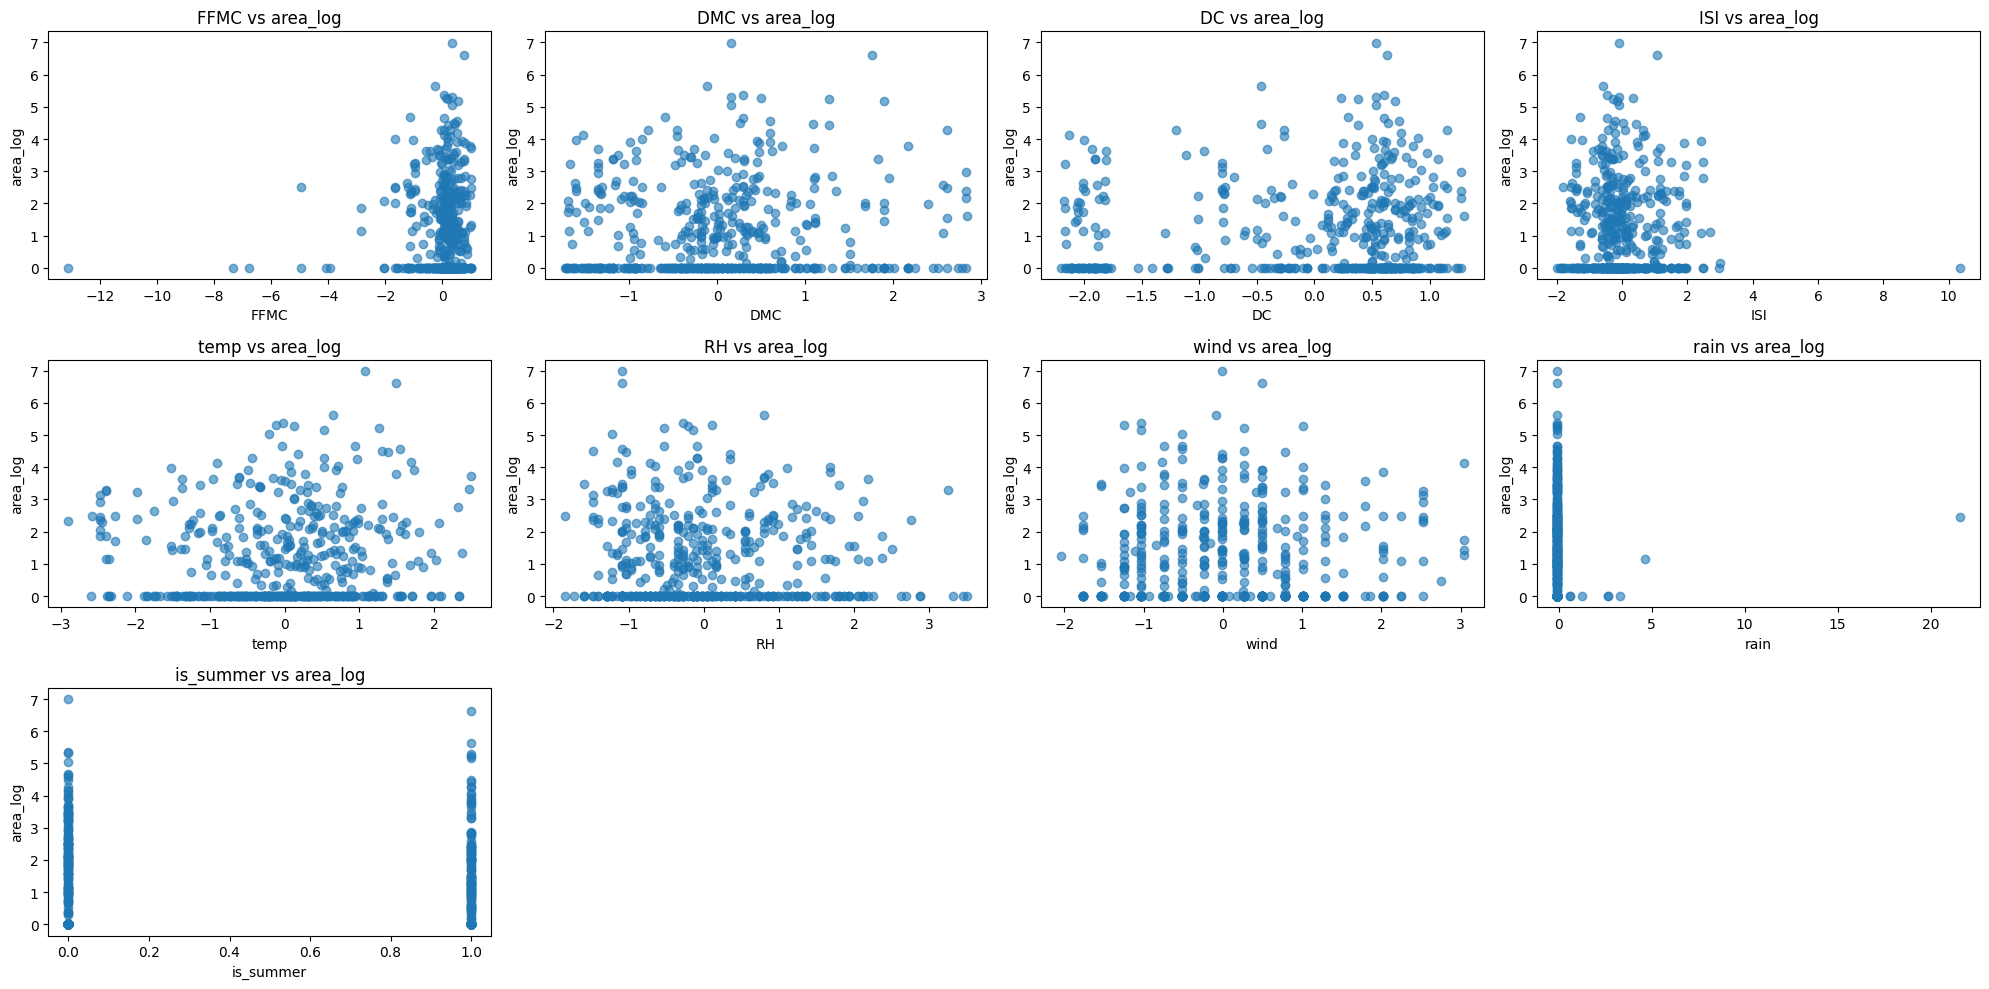

In [116]:
# add the engineered column 'is_summer' to our list of columns to plot
plot_columns.append('is_summer')

# numerical_cols = fires_final_df.drop(columns=['area_log']).select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axes = axes.flatten()
# for each feature, create a scatter plot
for idx, col in enumerate(plot_columns):
    axes[idx].scatter(fires_final_df[col], fires_final_df['area_log'], alpha=0.6)
    axes[idx].set_title(f'{col} vs area_log')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('area_log')
# remove any unused subplots
for i in range(idx+1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Observations 
It appears that there is no linear relationships with the target, so probably we will not get such good results with a linear model. Let's continue and see. 

## Subset Selection <a name="subset-sel"></a>

### Sequential Feature Selection
Let's use sequential feature selection to determine which features might be useful for generating predictions. First we'll perform forward selection, meaning we start with a intercept-only model and add features to it.

In [117]:
# first create the features X and y datasets
X = fires_final_df.drop(['area_log'], axis=1)
y = fires_final_df['area_log']

In [119]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

for i in [2, 4, 6]:
    lm = LinearRegression()
    forward_lm = SequentialFeatureSelector(estimator=lm, n_features_to_select=i, direction="forward")
    forward_lm.fit(X, y)
    print(f"Using forward selection, with {i} features, these may be the most useful: {forward_lm.get_feature_names_out()}")

With 2 features, these may be the most useful: ['FFMC' 'DC']
With 4 features, these may be the most useful: ['FFMC' 'DC' 'RH' 'wind']
With 6 features, these may be the most useful: ['is_summer' 'FFMC' 'DC' 'ISI' 'RH' 'wind']


Next, we'll peform backward selection, meaning we start with all of the predictors and remove them one-by-one.

In [121]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

for i in [2, 4, 6]:
    lm = LinearRegression()
    backward_lm = SequentialFeatureSelector(estimator=lm, n_features_to_select=i, direction="backward")
    backward_lm.fit(X, y)
    print(f"Using backward selection, with {i} features, these may be the most useful: {backward_lm.get_feature_names_out()}")

Using backward selection, with 2 features, these may be the most useful: ['DC' 'wind']
Using backward selection, with 4 features, these may be the most useful: ['FFMC' 'DC' 'RH' 'wind']
Using backward selection, with 6 features, these may be the most useful: ['is_summer' 'FFMC' 'DC' 'ISI' 'RH' 'wind']


#### Obervations
Interestingly, with both forward- and backward selection, the selector always includes the 'DC' feature. For 4 and 6 features, both select the same list of features. That could be an important observatiob for us to decide which and how many features to include.
Going forward, let's include 3 features which seems common between both selections: 'DC', 'FFMC' and 'wind'

## Developing Candidate Models <a name="dev-models"></a>

Learn

The models chosen by subset selection are still linear models at heart, and they may not be the best solution to this problem. Despite their widespread utility, some problems have a non-linear component that standard linear regression models can't account for. Think about incorporating some of the more flexible models that we've learned about as candidate models: polynomials and splines.

Remember that this extra flexibility comes at a price: an increased chance of overfitting. Including higher polynomials, more knots, or many features in the model may help with predictive ability on the training set, but we may be setting ourselves up for poor performance on the test set. In the case of many features, we can also turn to regularization to account for this.

Developing candidate models can be a slow process, but it's worth exploring our options as much as we have time for. Many of these models will perform poorly, but this can also give us insight into how we can iterate on and improve them.
Instructions

1. Consider adding regularized models such as ridge or LASSO to your pool of candidate models.
    Check that the chosen tuning parameter doesn't appear on the boundaries of the given alphas argument.
    Check the coefficients of the resulting model. If the tuning parameter is too high, it will remove all of the features!
2. Consider adding a non-linear model such as a polynomial regression or spline to your pool of candidate models.
    Examine the visualizations that you made to check if a feature has a non-linear relationship with the outcome.
    Play around with the degree of the polynomial/spline or the number of knots to fine-tune a potential model.


As we observed earlier during the univariate analysis, a linear model may not be the best solution to this prediction problem. Next we're going to investigate whether polynomial and spline models, which are more flexible versions of linear models.

#### Polynomial Model

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X_select = X[['DC',
            'FFMC',
            'wind'
            ]]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.20, random_state=42)

# create a polynomial instance, fit and transform it on test and training data
poly = PolynomialFeatures(degree=2, include_bias=False)
quad_X_train = poly.fit_transform(X_train)
quad_X_test = poly.transform(X_test)

# compare linear and polynomial
linear = LinearRegression()
quadratic = LinearRegression()

linear.fit(X_train, y_train)
quadratic.fit(quad_X_train, y_train)

linear_mse = mean_squared_error(linear.predict(X_test), y_test)
quadratic_mse = mean_squared_error(quadratic.predict(quad_X_test), y_test)

print(f"The linear model MSE: {linear_mse}")
print(f"The polynomial model MSE: {quadratic_mse}")

The linear model MSE: 2.167365378529545
The polynomial model MSE: 2.1562168311863874


#### Spline Model

In [133]:
from sklearn.preprocessing import SplineTransformer

spline = SplineTransformer(degree=1, n_knots=2)
spline_X_train = spline.fit_transform(X_train)

model = LinearRegression()
model.fit(spline_X_train, y_train)
spline_X_test = spline.transform(X_test)
spline_mse = mean_squared_error(y_test, model.predict(spline_X_test))

print(f"The spline model MSE: {spline_mse}")

The spline model MSE: 2.1672450035365003


#### Observations
Neither the polynomial model nor the spline model hardly performed better than the linear model.

## K-Fold Cross-Validation <a name="kfold-cv"></a>

Learn

Now that we have a few candidate models, let's evaluate all of them using k-fold cross-validation. As we've seen before, k-fold cross-validation gives us a better idea about model performance on unseen datasets compared to a single train-test split.
Instructions

1. Decide how many folds to use in your k-fold cross-validation process. Recall that using k=5 or k=10 is a good compromise between bias and variance, so decide, and record it in your notebook.
2. Iterate through all of the models that you've constructed so far, and evaluate their test MSE using k-fold cross-validation. You may use another loss function such as the mean absolute error (MAE), but it's important to keep the metric consistent across the models.
3. After examining the average and standard deviation of the test MSEs, write a few notes regarding which model seems to perform the best.


## Examining Model Weaknesses <a name="exam-weak"></a>

Learn

Now that we've created many candidate models, we can choose the best and start to determine where our data might be lacking. To do this, we need to visualize how the model predictions compare against the actual observed values in the data. It may be the case that our model performs well on a particular subset of outcomes but poorly on another subset. The only way to know this is to visualize these differences.

Let's visualize our model performance!
Instructions

1. Calculate the predicted values of your best performing model.
2. Then, calculate the residuals of the model. Recall that the residuals are the difference between the observed values and the predicted values.
3. Plot the relevant features of your model against both the observed outcomes and the predicted values. Examine how the predictions line up with the observed values, and note any trends or patterns you see.
4. Finally, plot the residuals as a function of the predicted values. Make notes here too on any patterns you see in this relationship.


## Final Conclusions <a name="final"></a>